In [1]:

from deepface import DeepFace
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
target_img_path = "img1.jpg"

In [3]:
dfs = DeepFace.find(img_path = target_img_path,
                    db_path = "./Images",
                    model_name = 'VGG-Face',
                    enforce_detection=False,
                    detector_backend = 'mtcnn')

24-05-25 14:52:55 - Found 12 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/12 [00:00<?, ?it/s]

3/3 [==============================] - 1s 12ms/step


Finding representations:   8%|▊         | 1/12 [01:42<18:47, 102.52s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  17%|█▋        | 2/12 [03:11<15:43, 94.34s/it] 

10/10 [==============================] - 0s 13ms/step


Finding representations:  25%|██▌       | 3/12 [04:45<14:08, 94.31s/it]

2/2 [==============================] - 0s 15ms/step


Finding representations:  33%|███▎      | 4/12 [04:50<07:53, 59.21s/it]

1/1 [==============================] - 0s 30ms/step


Finding representations:  42%|████▏     | 5/12 [06:23<08:19, 71.37s/it]

5/5 [==============================] - 0s 11ms/step


Finding representations:  50%|█████     | 6/12 [08:10<08:19, 83.31s/it]

5/5 [==============================] - 0s 14ms/step


Finding representations:  58%|█████▊    | 7/12 [09:43<07:13, 86.60s/it]

5/5 [==============================] - 0s 14ms/step


Finding representations:  67%|██████▋   | 8/12 [09:56<04:11, 62.98s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  75%|███████▌  | 9/12 [10:00<02:14, 44.84s/it]

8/8 [==============================] - 0s 13ms/step


Finding representations:  83%|████████▎ | 10/12 [10:22<01:15, 37.77s/it]

9/9 [==============================] - 0s 14ms/step


Finding representations:  92%|█████████▏| 11/12 [12:04<00:57, 57.24s/it]

13/13 [==============================] - 0s 14ms/step


Finding representations: 100%|██████████| 12/12 [13:36<00:00, 68.02s/it]


24-05-25 15:06:32 - There are now 86 representations in ds_model_vggface_detector_mtcnn_aligned_normalization_base_expand_0.pkl
24-05-25 15:06:32 - Searching img1.jpg in 86 length datastore
3/3 [==============================] - 0s 14ms/step
24-05-25 15:06:37 - find function duration 822.439738035202 seconds


In [4]:
print(dfs)

[                   identity                                      hash  \
0  ./Images\IMG_2397_-2.jpg  acbd4a0f1b1d68b3817b2469d4f1332cd215e01c   
1  ./Images\IMG_2397_-2.jpg  acbd4a0f1b1d68b3817b2469d4f1332cd215e01c   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0      2105      1843       146       193       723       485      1457   
1      4575      1934       149       177       723       485      1457   

   source_h  threshold  distance  
0      1781       0.68  0.626565  
1      1781       0.68  0.679753  ,                                  identity  \
0                   ./Images\IMG_6466.jpg   
1                 ./Images\IMG_6463-2.jpg   
2                   ./Images\IMG_6479.jpg   
3                   ./Images\IMG_1856.jpg   
4                 ./Images\IMG_6463-2.jpg   
5   ./Images\PXL_20240301_075849777-2.jpg   
6                 ./Images\167A1160-2.jpg   
7   ./Images\PXL_20240301_075849777-2.jpg   
8                 ./Images\IMG_6463-2.jpg 

In [5]:
# Ensure dfs is a list of DataFrames and concatenate them
if isinstance(dfs, list):
    df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
elif isinstance(dfs, pd.DataFrame):
    df = dfs
else:
    raise ValueError("The object returned by DeepFace.find is neither a DataFrame nor a list of DataFrames.")


In [6]:
# Iterate through the rows and print matched images and distances
for index, row in df.iterrows():
    print(f"Matched Image: {row['identity']}, Distance: {row['distance']}")


Matched Image: ./Images\IMG_2397_-2.jpg, Distance: 0.6265648385204915
Matched Image: ./Images\IMG_2397_-2.jpg, Distance: 0.6797527358334328
Matched Image: ./Images\IMG_6466.jpg, Distance: 0.19388304855518113
Matched Image: ./Images\IMG_6463-2.jpg, Distance: 0.2175969385688845
Matched Image: ./Images\IMG_6479.jpg, Distance: 0.24120654970813615
Matched Image: ./Images\IMG_1856.jpg, Distance: 0.2474505807925228
Matched Image: ./Images\IMG_6463-2.jpg, Distance: 0.28043709054886434
Matched Image: ./Images\PXL_20240301_075849777-2.jpg, Distance: 0.2903600820525648
Matched Image: ./Images\167A1160-2.jpg, Distance: 0.30227801922463937
Matched Image: ./Images\PXL_20240301_075849777-2.jpg, Distance: 0.31545084543771185
Matched Image: ./Images\IMG_6463-2.jpg, Distance: 0.31559490049601424
Matched Image: ./Images\IMG_6479.jpg, Distance: 0.33553484818546275
Matched Image: ./Images\167A1160-2.jpg, Distance: 0.3498095532874348
Matched Image: ./Images\IMG_6479.jpg, Distance: 0.3544639885190468
Matched

In [7]:
# Filter matches based on a distance threshold
threshold = 0.6
matches = df[df['distance'] <= threshold].drop_duplicates(subset='identity')
print(matches)
6

                                 identity  \
2                   ./Images\IMG_6466.jpg   
3                 ./Images\IMG_6463-2.jpg   
4                   ./Images\IMG_6479.jpg   
5                   ./Images\IMG_1856.jpg   
7   ./Images\PXL_20240301_075849777-2.jpg   
8                 ./Images\167A1160-2.jpg   
17    ./Images\PXL_20240301_075300137.jpg   
19                  ./Images\_DSC0777.jpg   

                                        hash  target_x  target_y  target_w  \
2   63bba06fe983aaa3ea3e26b0b4e02e86a9d89ec9      2447       878       136   
3   206db169dad6ec13372d5c624f0a1fe3a92e6aea       454      1638        61   
4   bfc12cfa06dff92190394faa7ada79462acda799      3255       212        29   
5   03ce99cffaa32e4b3baf32a5fb5c4fd1c80d8c8a       262      2212       105   
7   3877e428044285e612a338b88de4d1fedc46bdb6      2419      1753        55   
8   013a7bc5985701c5365e3f4ffd35bb9fdb63a8bb       242       224       461   
17  bb10d2970f5683a552de4cf962a83597a4a90159    

6

                                 identity  \
2                   ./Images\IMG_6466.jpg   
3                 ./Images\IMG_6463-2.jpg   
4                   ./Images\IMG_6479.jpg   
5                   ./Images\IMG_1856.jpg   
7   ./Images\PXL_20240301_075849777-2.jpg   
8                 ./Images\167A1160-2.jpg   
17    ./Images\PXL_20240301_075300137.jpg   
19                  ./Images\_DSC0777.jpg   

                                        hash  target_x  target_y  target_w  \
2   63bba06fe983aaa3ea3e26b0b4e02e86a9d89ec9      2447       878       136   
3   206db169dad6ec13372d5c624f0a1fe3a92e6aea       454      1638        61   
4   bfc12cfa06dff92190394faa7ada79462acda799      3255       212        29   
5   03ce99cffaa32e4b3baf32a5fb5c4fd1c80d8c8a       262      2212       105   
7   3877e428044285e612a338b88de4d1fedc46bdb6      2419      1753        55   
8   013a7bc5985701c5365e3f4ffd35bb9fdb63a8bb       242       224       461   
17  bb10d2970f5683a552de4cf962a83597a4a90159    

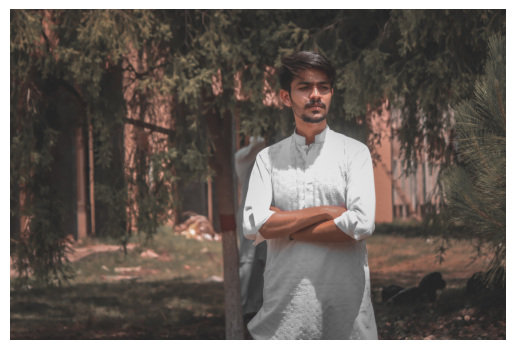

Displaying matched image: ./Images\IMG_6463-2.jpg
10/10 [==============================] - 0s 12ms/step


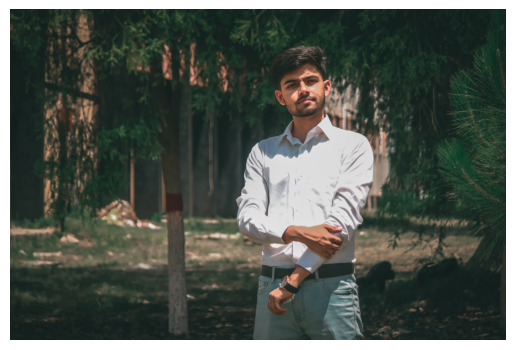

Displaying matched image: ./Images\IMG_6479.jpg
5/5 [==============================] - 0s 12ms/step


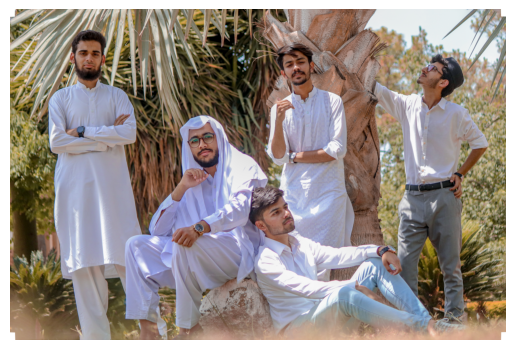

Displaying matched image: ./Images\IMG_1856.jpg
3/3 [==============================] - 0s 9ms/step


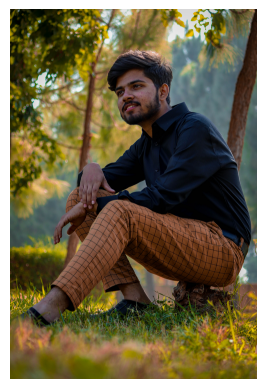

Displaying matched image: ./Images\PXL_20240301_075849777-2.jpg
5/5 [==============================] - 0s 11ms/step


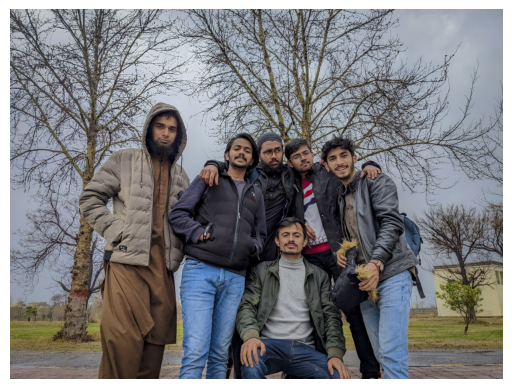

Displaying matched image: ./Images\167A1160-2.jpg
5/5 [==============================] - 0s 11ms/step


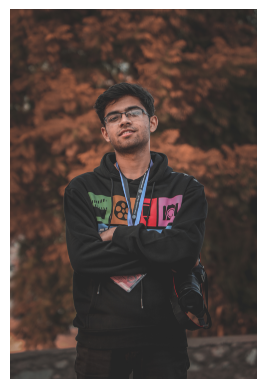

Displaying matched image: ./Images\PXL_20240301_075300137.jpg
2/2 [==============================] - 0s 12ms/step


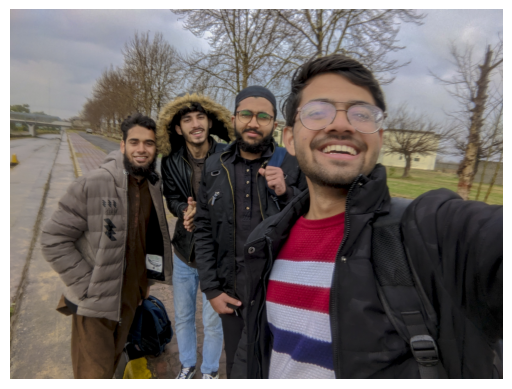

Displaying matched image: ./Images\_DSC0777.jpg
9/9 [==============================] - 0s 12ms/step


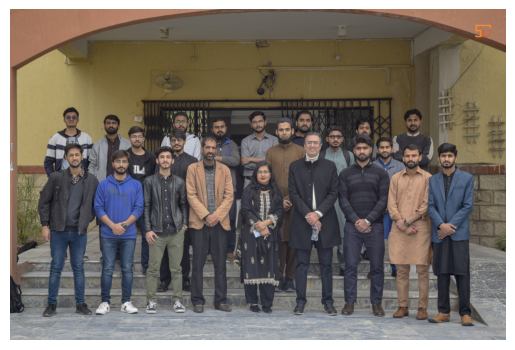

In [10]:
# Filter matches based on a distance threshold
threshold = 0.5
matches = df[df['distance'] <= threshold].drop_duplicates(subset='identity')
print(matches)

# Function to display image with bounding boxes for identified faces
def display_image_with_identified_faces(image_path, target_feature):
    img = cv2.imread(image_path)
    faces = DeepFace.extract_faces(img_path=image_path, detector_backend='mtcnn', enforce_detection=False, align=False)

    for face_info in faces:
        if isinstance(face_info, dict) and 'embedding' in face_info and 'facial_area' in face_info:
            face_feature = np.array(face_info['embedding'])
            distance = np.linalg.norm(face_feature - target_feature)
            if distance <= threshold:
                face_location = face_info['facial_area']
                left = face_location['x']
                top = face_location['y']
                right = left + face_location['w']
                bottom = top + face_location['h']
                cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Extract the feature of the target image
target_feature = DeepFace.represent(img_path=target_img_path, model_name='VGG-Face', enforce_detection=False)[0]['embedding']
target_feature = np.array(target_feature)

# Iterate through the matched images and display them with bounding boxes
for index, row in matches.iterrows():
    image_path = row['identity']
    print(f"Displaying matched image: {image_path}")
    display_image_with_identified_faces(image_path, target_feature)